# 230968038 - WEEK8 - 09/10/2024 - HIMANJALI GANAPA 

## Clustering Exercise
1. Read and write a summary of the metadata
2. Select only the transactions that have occurred from 01/04/2011 and 09/12/2011 and create a dataset
3. Calculate the RFM values for each customer (by customer ID). RFM represents:
  * R (Recency) - Recency should be calculated as the number of months before he or she has made a purchase from the online store. If he/she made a purchase in the month of December 2011, then the Recency should be 0. If purchase is made in November 2011 then Recency should be 1 and so on and so forth. 
  * F (Frequency) - Number of invoices by the cutomer from 01/04/2011 nd 09/12/2011
  * M (Monetary Value) - Total spend by the customer from 01/04/2011 nd 09/12/2011
4. Use elbow method to identify how many cutomer segments exist, using the RFM values for each customer.
5. Create the customer segments with K-Means algorithm by using number of clusters suggested by elbow method.
6. <b>from sklearn.cluster import KMeans</b>
  * Plot the clusters in a scatter plot and mark each segment differently using Implot
  * Print the cluster centers of each customer segment and explain them intuitively. 
  * Create the customer segments with Agglomerative algorithm by using number of clusters as suggested by elbow method
7. <b>from sklearn.cluster import AgglomerativeClustering</b>
  * Visualize the clusters using the dendogram
  * Compare the clusters obtained using KMeans vs. Agglomeration

## 1.Read and write a summary of data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df1=pd.read_excel("D:\\230968038- HIMANJALI GANAPA\\DA Lab\\Pdf Questions\\Online Retail.xlsx")
df1['InvoiceDate']=pd.to_datetime(df1["InvoiceDate"])
df1["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [4]:
metadata_sum = {
    'Shape': df1.shape,
    'Columns': df1.columns.tolist(),
    'df Types': df1.dtypes.to_dict(),
    'Missing Values': df1.isnull().sum().to_dict(),
}
print(f"{metadata_sum}\n" )

{'Shape': (541909, 8), 'Columns': ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'], 'df Types': {'InvoiceNo': dtype('O'), 'StockCode': dtype('O'), 'Description': dtype('O'), 'Quantity': dtype('int64'), 'InvoiceDate': dtype('<M8[ns]'), 'UnitPrice': dtype('float64'), 'CustomerID': dtype('float64'), 'Country': dtype('O')}, 'Missing Values': {'InvoiceNo': 0, 'StockCode': 0, 'Description': 1454, 'Quantity': 0, 'InvoiceDate': 0, 'UnitPrice': 0, 'CustomerID': 135080, 'Country': 0}}



## 2.Select only the transactions that have occurred from 01/04/2011 and 09/12/2011 and create a dataset

In [5]:
filtered_df1 = df1[(df1['InvoiceDate'] >= '2011-04-01') & (df1['InvoiceDate'] <= '2011-12-09')]

In [5]:
filtered_df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom
...,...,...,...,...,...,...,...,...
540272,581474,21253,SET OF PICTURE FRAME STICKERS,1,2011-12-08 20:01:00,0.79,12748.0,United Kingdom
540273,581474,22108,PING! MICROWAVE PLATE,1,2011-12-08 20:01:00,1.25,12748.0,United Kingdom
540274,581474,22167,OVAL WALL MIRROR DIAMANTE,1,2011-12-08 20:01:00,9.95,12748.0,United Kingdom
540275,581474,21929,JUMBO BAG PINK VINTAGE PAISLEY,1,2011-12-08 20:01:00,2.08,12748.0,United Kingdom


## 3. Calculate the RFM values for each customer (by customer ID).

In [6]:
reference_date = pd.Timestamp('2011-12-31')
rfm = filtered_df1.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (reference_date - x.max()).days // 30),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary_Value=('Quantity', lambda x: (x * filtered_df1.loc[x.index, 'UnitPrice']).sum())
).reset_index()
rfm

,CustomerID,Recency,Frequency,Monetary_Value
0,12347.0,0,5,3122.82
1,12348.0,3,2,677.00
2,12349.0,1,1,1757.55
3,12352.0,1,3,944.23
4,12353.0,7,1,89.00
...,...,...,...,...
3869,18278.0,3,1,173.90
3870,18281.0,6,1,80.82
3871,18282.0,0,3,176.60
3872,18283.0,0,13,1776.98


## 4. Use elbow method to identify how many cutomer segments exist, using the RFM values for each customer.

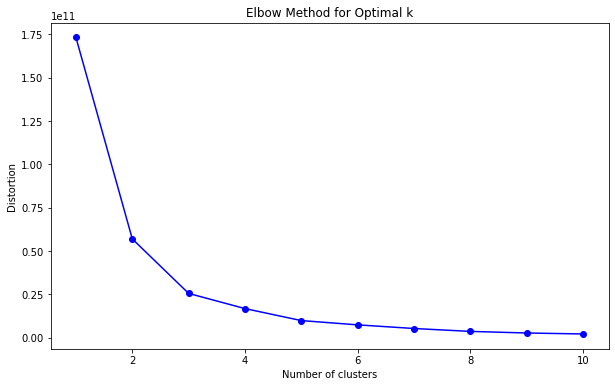

In [7]:
from sklearn.cluster import KMeans
distortions = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(rfm[['Recency', 'Frequency', 'Monetary_Value']])
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

## 5. Create the customer segments with K-Means algorithm by using number of clusters suggested by elbow method.
## 6a.Plot the clusters in a scatter plot and mark each segment differently using Implot
## Print the cluster centers of each customer segment and explain them intuitively.

In [ ]:
#The graph indicates elbow point to be between 2 and 4 ,i.e., 3 clusters are optimal

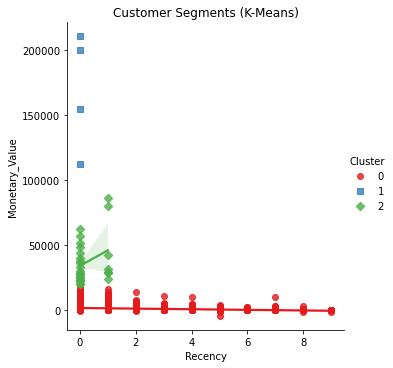

[[2.32864949e+00 3.86104606e+00 1.18499044e+03]
 [0.00000000e+00 9.07500000e+01 1.69445050e+05]
 [2.59259259e-01 4.36296296e+01 3.72821481e+04]]


In [9]:
kmeans = KMeans(n_clusters=3)
rfm['Cluster'] = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary_Value']])
sns.lmplot(data=rfm, x='Recency', y='Monetary_Value', hue='Cluster', palette='Set1', markers=["o", "s", "D"])
plt.title('Customer Segments (K-Means)')
plt.show()
# Print cluster centers
print(kmeans.cluster_centers_)

### 6b. Create the customer segments with Agglomerative algorithm by using number of clusters as suggested by elbow method.
### 7a. Visualize the clusters using the dendogram

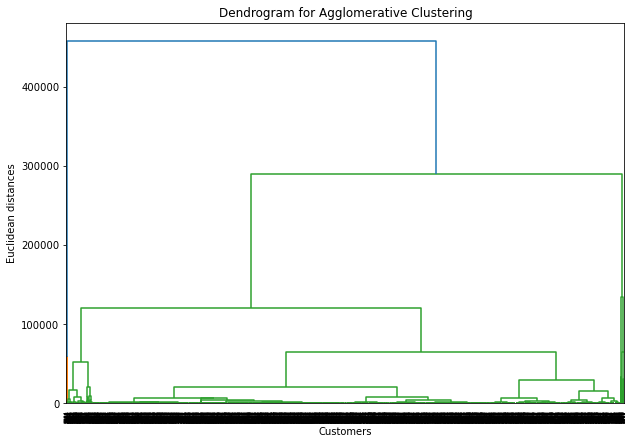

In [18]:
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(rfm[['Recency', 'Frequency', 'Monetary_Value']], method='ward'))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Customers')
plt.xticks(rotation=90)
plt.ylabel('Euclidean distances')
plt.show()


### 7b. Compare the clusters obtained using KMeans vs. Agglomeration

   CustomerID  Cluster  Cluster_Agglomerative
0     12347.0        0                      2
1     12348.0        0                      2
2     12349.0        0                      2
3     12352.0        0                      2
4     12353.0        0                      2


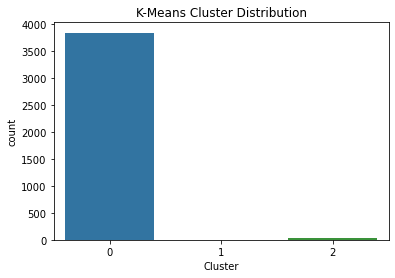

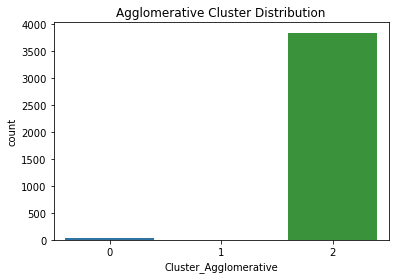

In [23]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3)
rfm['Cluster_Agglomerative'] = agglo.fit_predict(rfm[['Recency', 'Frequency', 'Monetary_Value']])
comparison = rfm[['CustomerID', 'Cluster', 'Cluster_Agglomerative']]
print(comparison.head())

sns.countplot(x='Cluster', data=comparison)
plt.title('K-Means Cluster Distribution')
plt.show()
sns.countplot(x='Cluster_Agglomerative', data=comparison)
plt.title('Agglomerative Cluster Distribution')
plt.show()

In [20]:
print("K-means Clusters: ")
print(rfm['Cluster'].value_counts())
print("\nAgglomerative Clusters: ")
print(rfm['Cluster_Agglomerative'].value_counts())

K-means Clusters: 
0    3843
2      27
1       4
Name: Cluster, dtype: int64

Agglomerative Clusters: 
2    3845
0      26
1       3
Name: Cluster_Agglomerative, dtype: int64
